In [1]:
import numpy as np
import h5py
from scipy.interpolate import interp1d
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import gridspec
plt.rc('text', usetex=True)

import glob
import os
import pickle
import sys

sys.path.append('/Users/fardila/Documents/GitHub/HSC_vs_hydro/')
from functions import *

/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Created TAP+ (v1.0) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


      +------------------------------------------------------------+
      |             Space Telescope Tables Package                 |
      |                  TABLES Version 3.18.3                     |
      |                                                            |
      |   Space Telescope Science Institute, Baltimore, Maryland   |
      |   Copyright (C) 2014 Association of Universities for       |
      |            Research in Astronomy, Inc.(AURA)               |
      |       See stsdas$copyright.stsdas for terms of use.        |
      |         For help, send e-mail to help@stsci.edu            |
      +------------------------------------------------------------+
tables/:
 fitsio/        tbplot/         tobsolete/      ttools/


      +------------------------------------------------------------+
      |       Space Telescope Science Data Analysis System         |
  

In [2]:
#data
Illustris_file_quick = '/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/Illustris/galaxies_stellarmaps_orig_11.2.hdf5'
TNG_file_quick = '/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/galaxies_stellarmaps_tng75_11.2.hdf5'

In [9]:
pixel_scale=2.*800./300 #kpc/pixel
print 'pixel scale: ', pixel_scale

pixel scale:  5.33333333333


In [5]:
i=0
iso_cen= get_iso(Illustris_file_quick,'Illustris', components='cen', gal_n=i)
iso_cen_icl= get_iso(Illustris_file_quick,'Illustris', components='cen+icl', gal_n=i)


----------------------------------------------------------------------------------------------------
###      galX, galY :  150.0 150.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 250
###      Stage :  3
###      Step :  0.05
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/quick_800/Illustris_0_xy_cen.fits
###      Input Image   : temp_MD0IH.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/quick_800/Illustris_0

In [6]:
iso_cen

sma,intens,int_err,pix_var,rms,ell,ell_err,pa,pa_err,x0,x0_err,y0,y0_err,grad,grad_err,grad_r_err,rsma,mag,mag_lerr,mag_uerr,tflux_e,tflux_c,tmag_e,tmag_c,npix_e,npix_c,a3,a3_err,b3,b3_err,a4,a4_err,b4,b4_err,ndata,nflag,niter,stop,a_big,sarea,a1,a1_err,b1,b1_err,a2,a2_err,b2,b2_err,pa_norm,sbp_ori,sbp_sub,sbp,intens_sub,intens_bkg,sbp_err,sbp_low,sbp_upp,sma_asec,rsma_asec,growth_ori,growth_sub,avg_x0,avg_y0,avg_q,avg_pa,avg_bkg,intens_cor,sbp_cor,growth_cor,rad_outer,mag_tot,mag_tot_ori,mag_tot_sub,sma_kpc,intens_kpc
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.0,114307000000.0,nan,nan,nan,nan,nan,nan,nan,150.0,nan,150.0,nan,-51506110000.0,nan,nan,0.0,-27.64518,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-24.010188427301795,-24.010188427301795,-24.010188427301795,114307000000.0,0.0,nan,nan,nan,0.0,0.0,0.0,0.0,150.00000000000003,150.00000000000003,0.62,-39.2,2761320.0,114304238680.0,-24.010162198800394,0.0,55.95850458922849,-30.865698728707876,-30.877446020298617,-30.877446020298617,0.0,4018605468.75
0.5095395,88062600000.0,3783796000.0,19293650000.0,13642670000.0,0.38,0.06021391,-39.2,5.788269,150.0,0.01988228,150.0,0.02163491,-44261190000.0,110098700000.0,2.487477,0.8448789,-27.36198,0.04768261,0.04567674,114307000000.0,114307000000.0,-27.64518,-27.64518,1.0,1.0,-0.004500652,0.03684477,0.08514605,0.21449,0.02817912,0.07088916,-0.09690122,0.2412546,13,0,1.0,0.0,nan,2.0,-4721842.0,237399296.0,38542368.0,229556528.0,-9423052.0,237175456.0,37629868.0,229173440.0,-39.2,-23.72698511936706,-23.72698511936706,-23.72698511936706,88062600000.0,0.0,0.04567653972491925,-23.77266165909198,-23.681308579642142,2.717544,1.2839382764460703,0.0,0.0,150.00000000000003,150.00000000000003,0.62,-39.2,2761320.0,88059838680.0,-23.7269510741299,0.0,55.95850458922849,-30.865698728707876,-30.877446020298617,-30.877446020298617,2.717544,3095950781.25
0.5350164,86926510000.0,3962977000.0,20207300000.0,14288720000.0,0.38,0.05953742,-39.2,5.723238,150.0,0.02064185,150.0,0.02246144,-43567550000.0,109824100000.0,2.520778,0.8552474,-27.34788,0.05066327,0.0484028,114307000000.0,114307000000.0,-27.64518,-27.64518,1.0,1.0,-0.004660876,0.03603771,0.08656572,0.2206751,0.02702757,0.06897956,-0.0936169,0.2362157,13,0,1.0,0.0,nan,2.0,-3817002.0,250322112.0,31565514.0,242052432.0,-7677288.0,250225552.0,31072934.0,241783216.0,-39.2,-23.712886969189295,-23.712886969189295,-23.712886969189295,86926510000.0,0.0,0.04840352157339822,-23.761290490762693,-23.664483447615897,2.8534207999999994,1.2996950224183725,4505801700.794943,4505801700.794943,150.00000000000003,150.00000000000003,0.62,-39.2,2761320.0,86923748680.0,-23.71285247898928,4505658568.851047,55.95850458922849,-30.865698728707876,-30.877446020298617,-30.877446020298617,2.8534207999999994,3056010117.1875
0.5617672,85751530000.0,4150765000.0,21164830000.0,14965800000.0,0.38,0.0588497,-39.2,5.657129,150.0,0.02142359,150.0,0.02331208,-42843830000.0,109556400000.0,2.557111,0.8657432,-27.33311,0.0538695,0.05132183,114307000000.0,114307000000.0,-27.64518,-27.64518,1.0,1.0,-0.004851614,0.0352176,0.08809453,0.2275013,0.02578675,0.06685724,-0.09003288,0.230469,13,0,1.0,0.0,nan,2.0,-2747299.0,264566640.0,23309490.0,255826384.0,-5612164.0,264580384.0,23307724.0,255653744.0,-39.2,-23.698111054252337,-23.698111054252337,-23.698111054252337,85751530000.0,0.0,0.05132225211560737,-23.749433306367944,-23.64678880

In [7]:
iso_cen_icl

sma,intens,int_err,pix_var,rms,ell,ell_err,pa,pa_err,x0,x0_err,y0,y0_err,grad,grad_err,grad_r_err,rsma,mag,mag_lerr,mag_uerr,tflux_e,tflux_c,tmag_e,tmag_c,npix_e,npix_c,a3,a3_err,b3,b3_err,a4,a4_err,b4,b4_err,ndata,nflag,niter,stop,a_big,sarea,a1,a1_err,b1,b1_err,a2,a2_err,b2,b2_err,pa_norm,sbp_ori,sbp_sub,sbp,intens_sub,intens_bkg,sbp_err,sbp_low,sbp_upp,sma_asec,rsma_asec,growth_ori,growth_sub,avg_x0,avg_y0,avg_q,avg_pa,avg_bkg,intens_cor,sbp_cor,growth_cor,rad_outer,mag_tot,mag_tot_ori,mag_tot_sub,sma_kpc,intens_kpc
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.0,114307000000.0,nan,nan,nan,nan,nan,nan,nan,150.0,nan,150.0,nan,-51505500000.0,nan,nan,0.0,-27.64518,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-24.010188427301795,-24.010188427301795,-24.010188427301795,114307000000.0,0.0,nan,nan,nan,0.0,0.0,0.0,0.0,149.99999999999997,149.99999999999997,0.6200000000000001,-39.24999999999999,2768050.0,114304231950.0,-24.010162134874463,0.0,55.95850458922849,-30.865747414327537,-30.877522657010473,-30.877522657010473,0.0,4018605468.75
0.5095395,88062910000.0,3783915000.0,19294260000.0,13643100000.0,0.38,0.06023472,-39.25,5.79027,150.0,0.01989693,150.0,0.02163523,-44262310000.0,110101800000.0,2.487484,0.8448789,-27.36198,0.047684,0.04567806,114307000000.0,114307000000.0,-27.64518,-27.64518,1.0,1.0,-0.004515045,0.03687956,0.08512487,0.2144423,0.02783568,0.07004596,-0.09708355,0.2417087,13,0,1.0,0.0,nan,2.0,-4779882.0,237589264.0,38575664.0,229740224.0,-9544288.0,237365104.0,37640492.0,229356672.0,-39.25,-23.726988941394012,-23.726988941394012,-23.726988941394012,88062910000.0,0.0,0.04567778898834263,-23.772666730382355,-23.68131115240567,2.717544,1.2839382764460703,0.0,0.0,149.99999999999997,149.99999999999997,0.6200000000000001,-39.24999999999999,2768050.0,88060141950.0,-23.726954813299272,0.0,55.95850458922849,-30.865747414327537,-30.877522657010473,-30.877522657010473,2.717544,3095961679.6875
0.5350164,86926770000.0,3963117000.0,20208010000.0,14289220000.0,0.38,0.05955049,-39.25,5.724496,150.0,0.02065446,150.0,0.02245894,-43569380000.0,109827600000.0,2.520752,0.8552474,-27.34788,0.05066356,0.04840569,114307000000.0,114307000000.0,-27.64518,-27.64518,1.0,1.0,-0.004681438,0.03607391,0.08653581,0.2206013,0.02671217,0.06819464,-0.09377698,0.2366167,13,0,1.0,0.0,nan,2.0,-3873064.0,250464880.0,31596908.0,242190480.0,-7793498.0,250367984.0,31083176.0,241920848.0,-39.25,-23.712890216656504,-23.712890216656504,-23.712890216656504,86926770000.0,0.0,0.048405052365374956,-23.76129526902188,-23.66448516429113,2.8534207999999994,1.2996950224183725,4505815177.793412,4505815177.793412,149.99999999999997,149.99999999999997,0.6200000000000001,-39.24999999999999,2768050.0,86924001950.0,-23.71285564249767,4505671697.002594,55.95850458922849,-30.865747414327537,-30.877522657010473,-30.877522657010473,2.8534207999999994,3056019257.8125
0.5617672,85752040000.0,4150860000.0,21165320000.0,14966140000.0,0.38,0.05886847,-39.25,5.658934,150.0,0.0214388,150.0,0.02331181,-42845870000.0,109559500000.0,2.557062,0.8657432,-27.33311,0.05386977,0.05132343,114307000000.0,114307000000.0,-27.64518,-27.64518,1.0,1.0,-0.004881626,0.03526636,0.0880761,0.2274535,0.02548088,0.06608626,-0.09019488,0.2308788,13,0,1.0,0.0,nan,2.0,-2802948.0,264799648.0,23329062.0,256051680.0,-5727759.0,264813344.0,23306580.0,255878848.0,-39.25,-23.69811751155774,-23.69811751155

0


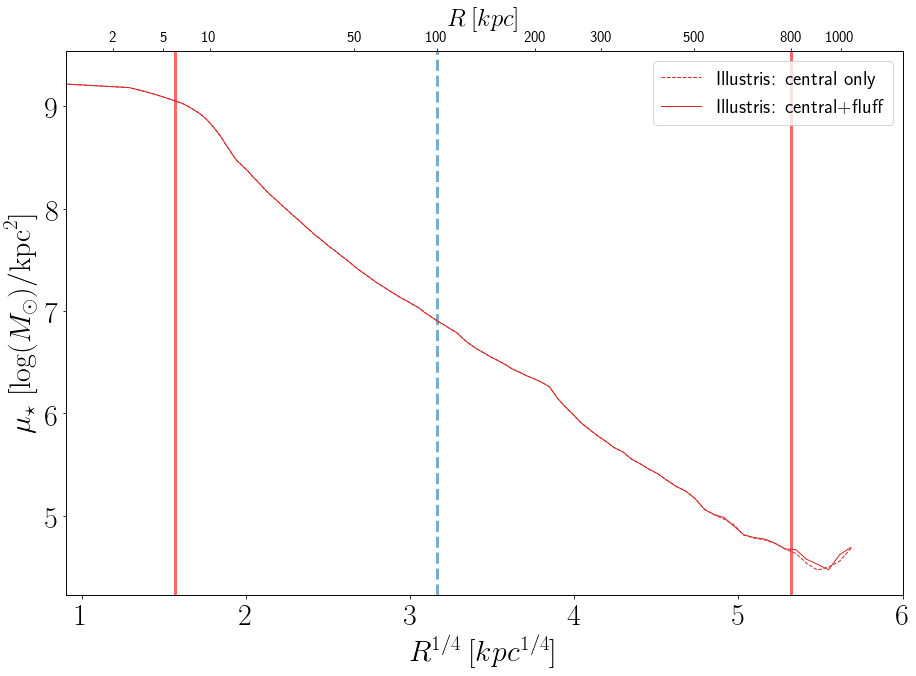

In [11]:
ngals1=0

#plot
fig =plt.figure(figsize=(15, 10))
ax1 = plt.subplot()


######################################################################################################################
# plot
######################################################################################################################
#hsc
# ax1.plot(RSMA_COMMON, hscMedProf_116_118, linestyle='--', linewidth=4.0, c='k',
#          alpha=1, zorder=8, label='HSC')
# ax2.plot(RSMA_COMMON, hscMedProf_118_120, linestyle='--', linewidth=4.0, c='k',
#          alpha=1, zorder=8, label='HSC')
  


# for iso in illustris_cen_icl_isos:   
    

#         ngals1+=1

#         #illustris_isos1.append(iso)

#         ax1.plot((iso['sma'] * pixel_scale) ** 0.25,
#              np.log10(iso['intens'] / (pixel_scale**2.0))+ np.log10(0.7 ** 2.0) , linewidth=0.5, c=u'#d62728', alpha=0.1, 
#                  label='_nolegend_', zorder=1)
#                  #label='Illustris Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))


# ## median profiles for illustris
# median_cen_icl_sma1, median_cen_icl_mu1 = get_median_profile(illustris_cen_icl_isos, pixel_scale = pixel_scale, rmax=800.**0.25)

ax1.plot((iso_cen['sma'] * pixel_scale) ** 0.25, np.log10(iso_cen['intens'] / (pixel_scale**2.0))+ np.log10(0.7 ** 2.0),
         linewidth=1.0, c=u'#d62728', alpha=1,
         label='Illustris: central only', linestyle='--', zorder=8)
ax1.plot((iso_cen_icl['sma'] * pixel_scale) ** 0.25, np.log10(iso_cen_icl['intens'] / (pixel_scale**2.0))+ np.log10(0.7 ** 2.0),
         linewidth=1.0, c=u'#d62728', alpha=1,
         label='Illustris: central+fluff', zorder=8)


print ngals1


######################################################################################################################
# plot details
######################################################################################################################
# # X-Y limits
ax1.set_xlim(0.9, 6)
#ax1.set_ylim(-2, 10)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25, 500**0.25, 800**0.25, 1000**0.25])
ax1_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300, 500, 800, 1000])
ax1_twin.tick_params(axis='both', which='major', labelsize=15)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax1.axvline(800.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_Illustris.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()

### test with pickled files 

In [16]:
illustris_cen_icl_isos_file='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/Illustris/Illustris_isos_quick_cen+icl.pkl'
tng_cen_icl_isos_file='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/TNG_isos_quick_cen+icl.pkl'

illustris_isos_file='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/Illustris/Illustris_isos_quick.pkl'
tng_isos_file='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/TNG_isos_quick.pkl'


illustris_cen_icl_isos = load_pkl(illustris_cen_icl_isos_file)
tng_cen_icl_isos = load_pkl(tng_cen_icl_isos_file)

illustris_cen_isos = load_pkl(illustris_isos_file)
tng_cen_isos = load_pkl(tng_isos_file)

In [17]:
iso_cen = illustris_cen_isos[0]
iso_cen_icl = illustris_cen_icl_isos[0]

0


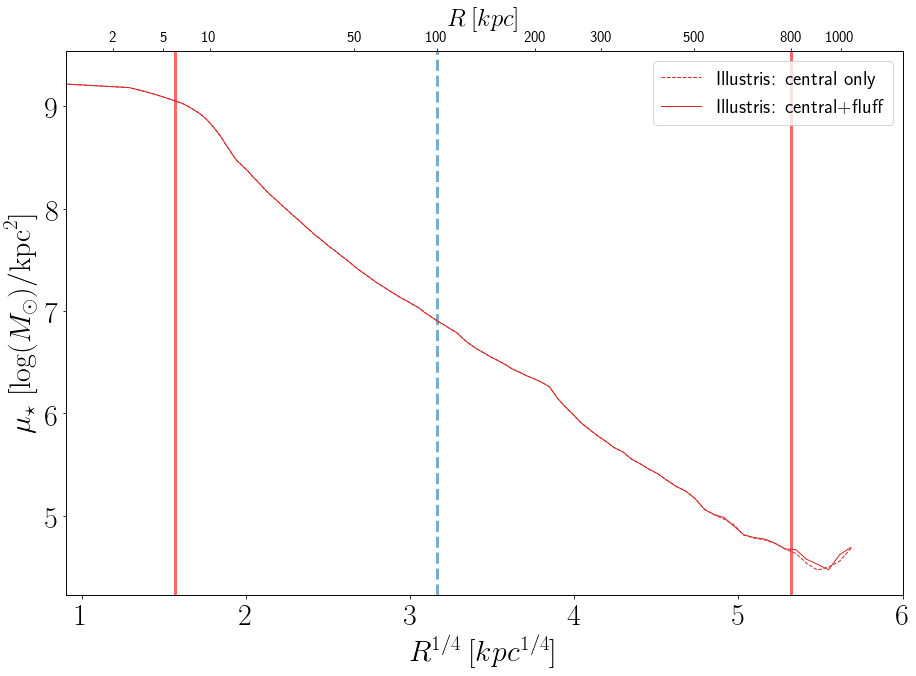

In [18]:
ngals1=0

#plot
fig =plt.figure(figsize=(15, 10))
ax1 = plt.subplot()


######################################################################################################################
# plot
######################################################################################################################
#hsc
# ax1.plot(RSMA_COMMON, hscMedProf_116_118, linestyle='--', linewidth=4.0, c='k',
#          alpha=1, zorder=8, label='HSC')
# ax2.plot(RSMA_COMMON, hscMedProf_118_120, linestyle='--', linewidth=4.0, c='k',
#          alpha=1, zorder=8, label='HSC')
  


# for iso in illustris_cen_icl_isos:   
    

#         ngals1+=1

#         #illustris_isos1.append(iso)

#         ax1.plot((iso['sma'] * pixel_scale) ** 0.25,
#              np.log10(iso['intens'] / (pixel_scale**2.0))+ np.log10(0.7 ** 2.0) , linewidth=0.5, c=u'#d62728', alpha=0.1, 
#                  label='_nolegend_', zorder=1)
#                  #label='Illustris Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))


# ## median profiles for illustris
# median_cen_icl_sma1, median_cen_icl_mu1 = get_median_profile(illustris_cen_icl_isos, pixel_scale = pixel_scale, rmax=800.**0.25)

ax1.plot((iso_cen['sma'] * pixel_scale) ** 0.25, np.log10(iso_cen['intens'] / (pixel_scale**2.0))+ np.log10(0.7 ** 2.0),
         linewidth=1.0, c=u'#d62728', alpha=1,
         label='Illustris: central only', linestyle='--', zorder=8)
ax1.plot((iso_cen_icl['sma'] * pixel_scale) ** 0.25, np.log10(iso_cen_icl['intens'] / (pixel_scale**2.0))+ np.log10(0.7 ** 2.0),
         linewidth=1.0, c=u'#d62728', alpha=1,
         label='Illustris: central+fluff', zorder=8)


print ngals1


######################################################################################################################
# plot details
######################################################################################################################
# # X-Y limits
ax1.set_xlim(0.9, 6)
#ax1.set_ylim(-2, 10)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25, 500**0.25, 800**0.25, 1000**0.25])
ax1_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300, 500, 800, 1000])
ax1_twin.tick_params(axis='both', which='major', labelsize=15)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax1.axvline(800.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_Illustris.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()

looks the same


### differences


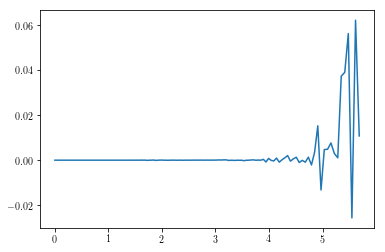

In [19]:
plt.plot((iso_cen['sma'] * pixel_scale) ** 0.25, 
         np.log10(iso_cen_icl['intens'] / (pixel_scale**2.0)) - np.log10(iso_cen['intens'] / (pixel_scale**2.0)))
plt.show()

## medians

In [23]:
nbin=150
def get_median_profile(isos, pixel_scale, quantity = 'intens', rmin=0.05, rmax=4.7, nbin=nbin):
    """Get the median profiles."""
    sma_common = np.linspace(rmin, rmax, nbin)
    
    if quantity == 'intens':
        mu = np.nanmedian(np.stack([interp1d((gal['sma'] * pixel_scale) ** 0.25, 
                                               np.log10(gal[quantity] / (pixel_scale ** 2)),
                                               bounds_error=False, 
                                               fill_value=np.nan, 
                                               kind='slinear')(sma_common) 
                               for gal in isos]), axis=0)
    elif quantity == 'growth_ori':
        mu = np.nanmedian(np.stack([interp1d((gal['sma'] * pixel_scale) ** 0.25, 
                                               np.log10(gal[quantity]),
                                               bounds_error=False, 
                                               fill_value=np.nan, 
                                               kind='slinear')(sma_common) 
                               for gal in isos]), axis=0)
    

    return sma_common, mu

In [20]:
iso_cen = illustris_cen_isos[0]
iso_cen_icl = illustris_cen_icl_isos[0]

In [25]:
median_cen_icl_sma1, median_cen_icl_mu1 = get_median_profile(illustris_cen_icl_isos, pixel_scale = pixel_scale, rmax=800.**0.25)

median_sma1, median_mu1 = get_median_profile(illustris_cen_isos, pixel_scale = pixel_scale, rmax=800.**0.25)


/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in subtract
  """Entry point for launching an IPython kernel.


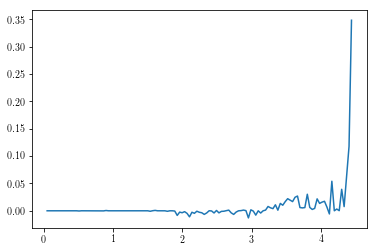

In [26]:
plt.plot(median_sma1, median_cen_icl_mu1 - median_mu1)
plt.show()

0


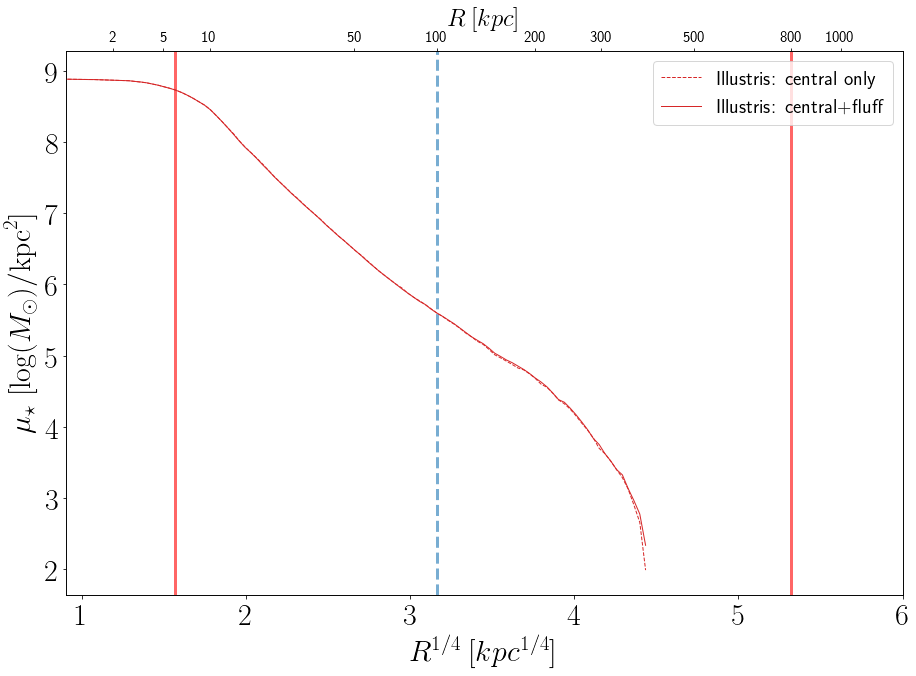

In [28]:
ngals1=0

#plot
fig =plt.figure(figsize=(15, 10))
ax1 = plt.subplot()


######################################################################################################################
# plot
######################################################################################################################
#hsc
# ax1.plot(RSMA_COMMON, hscMedProf_116_118, linestyle='--', linewidth=4.0, c='k',
#          alpha=1, zorder=8, label='HSC')
# ax2.plot(RSMA_COMMON, hscMedProf_118_120, linestyle='--', linewidth=4.0, c='k',
#          alpha=1, zorder=8, label='HSC')
  


# for iso in illustris_cen_icl_isos:   
    

#         ngals1+=1

#         #illustris_isos1.append(iso)

#         ax1.plot((iso['sma'] * pixel_scale) ** 0.25,
#              np.log10(iso['intens'] / (pixel_scale**2.0))+ np.log10(0.7 ** 2.0) , linewidth=0.5, c=u'#d62728', alpha=0.1, 
#                  label='_nolegend_', zorder=1)
#                  #label='Illustris Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))


# ## median profiles for illustris
# median_cen_icl_sma1, median_cen_icl_mu1 = get_median_profile(illustris_cen_icl_isos, pixel_scale = pixel_scale, rmax=800.**0.25)

ax1.plot(median_sma1, median_mu1,
         linewidth=1.0, c=u'#d62728', alpha=1,
         label='Illustris: central only', linestyle='--', zorder=8)
ax1.plot(median_sma1, median_cen_icl_mu1,
         linewidth=1.0, c=u'#d62728', alpha=1,
         label='Illustris: central+fluff', zorder=8)


print ngals1


######################################################################################################################
# plot details
######################################################################################################################
# # X-Y limits
ax1.set_xlim(0.9, 6)
#ax1.set_ylim(-2, 10)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25, 500**0.25, 800**0.25, 1000**0.25])
ax1_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300, 500, 800, 1000])
ax1_twin.tick_params(axis='both', which='major', labelsize=15)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax1.axvline(800.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_Illustris.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()

### at large radii


In [29]:
median_cen_icl_sma1, median_cen_icl_mu1 = get_median_profile(illustris_cen_icl_isos, pixel_scale = pixel_scale, 
                                                             rmin=100.**0.25, rmax=800.**0.25)

median_sma1, median_mu1 = get_median_profile(illustris_cen_isos, pixel_scale = pixel_scale, 
                                                             rmin=100.**0.25, rmax=800.**0.25)


/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in subtract
  """Entry point for launching an IPython kernel.


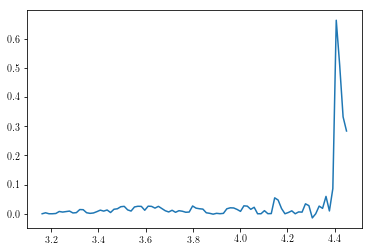

In [30]:
plt.plot(median_sma1, median_cen_icl_mu1 - median_mu1)
plt.show()

0


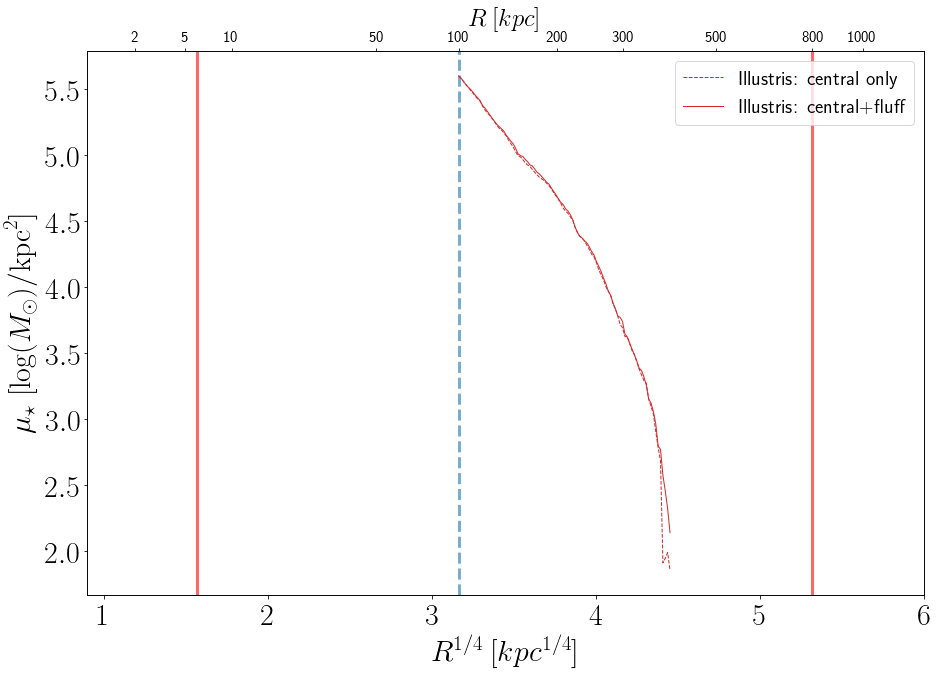

In [31]:
ngals1=0

#plot
fig =plt.figure(figsize=(15, 10))
ax1 = plt.subplot()


######################################################################################################################
# plot
######################################################################################################################
#hsc
# ax1.plot(RSMA_COMMON, hscMedProf_116_118, linestyle='--', linewidth=4.0, c='k',
#          alpha=1, zorder=8, label='HSC')
# ax2.plot(RSMA_COMMON, hscMedProf_118_120, linestyle='--', linewidth=4.0, c='k',
#          alpha=1, zorder=8, label='HSC')
  


# for iso in illustris_cen_icl_isos:   
    

#         ngals1+=1

#         #illustris_isos1.append(iso)

#         ax1.plot((iso['sma'] * pixel_scale) ** 0.25,
#              np.log10(iso['intens'] / (pixel_scale**2.0))+ np.log10(0.7 ** 2.0) , linewidth=0.5, c=u'#d62728', alpha=0.1, 
#                  label='_nolegend_', zorder=1)
#                  #label='Illustris Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))


# ## median profiles for illustris
# median_cen_icl_sma1, median_cen_icl_mu1 = get_median_profile(illustris_cen_icl_isos, pixel_scale = pixel_scale, rmax=800.**0.25)

ax1.plot(median_sma1, median_mu1,
         linewidth=1.0, c=u'#d62728', alpha=1,
         label='Illustris: central only', linestyle='--', zorder=8)
ax1.plot(median_sma1, median_cen_icl_mu1,
         linewidth=1.0, c=u'#d62728', alpha=1,
         label='Illustris: central+fluff', zorder=8)


print ngals1


######################################################################################################################
# plot details
######################################################################################################################
# # X-Y limits
ax1.set_xlim(0.9, 6)
#ax1.set_ylim(-2, 10)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25, 500**0.25, 800**0.25, 1000**0.25])
ax1_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300, 500, 800, 1000])
ax1_twin.tick_params(axis='both', which='major', labelsize=15)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax1.axvline(800.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_Illustris.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()

## TNG 

In [32]:
median_cen_icl_sma1, median_cen_icl_mu1 = get_median_profile(tng_cen_icl_isos, pixel_scale = pixel_scale, rmax=800.**0.25)

median_sma1, median_mu1 = get_median_profile(tng_cen_isos, pixel_scale = pixel_scale, rmax=800.**0.25)


/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in subtract
  """Entry point for launching an IPython kernel.


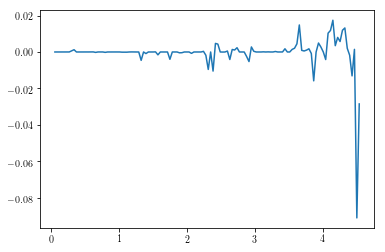

In [33]:
plt.plot(median_sma1, median_cen_icl_mu1 - median_mu1)
plt.show()

0


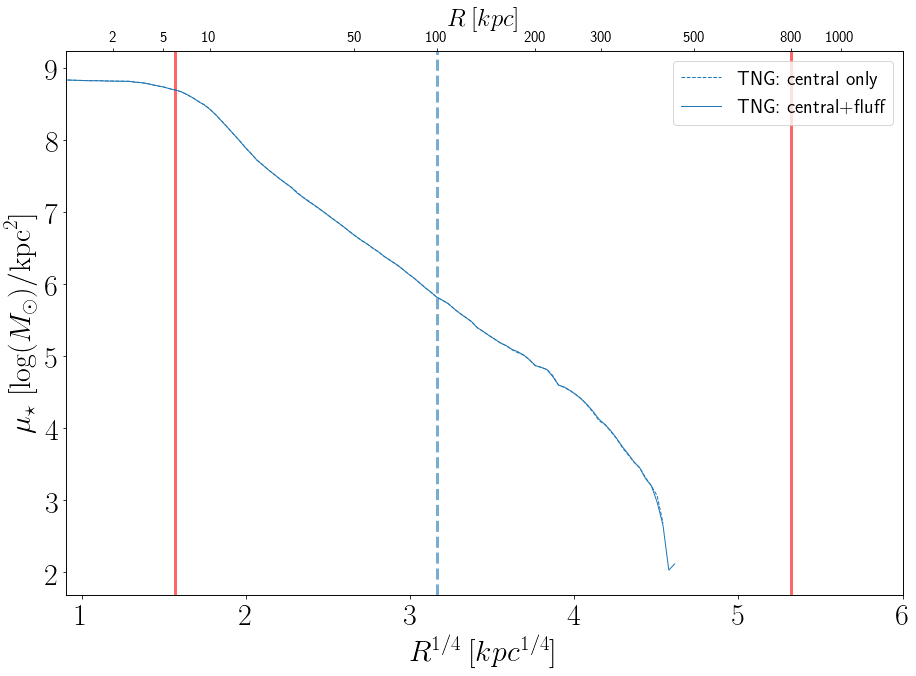

In [34]:
ngals1=0

#plot
fig =plt.figure(figsize=(15, 10))
ax1 = plt.subplot()


######################################################################################################################
# plot
######################################################################################################################
#hsc
# ax1.plot(RSMA_COMMON, hscMedProf_116_118, linestyle='--', linewidth=4.0, c='k',
#          alpha=1, zorder=8, label='HSC')
# ax2.plot(RSMA_COMMON, hscMedProf_118_120, linestyle='--', linewidth=4.0, c='k',
#          alpha=1, zorder=8, label='HSC')
  


# for iso in tng_cen_icl_isos:   
    

#         ngals1+=1

#         #tng_isos1.append(iso)

#         ax1.plot((iso['sma'] * pixel_scale) ** 0.25,
#              np.log10(iso['intens'] / (pixel_scale**2.0))+ np.log10(0.7 ** 2.0) , linewidth=0.5, c=u'#d62728', alpha=0.1, 
#                  label='_nolegend_', zorder=1)
#                  #label='TNG Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))


# ## median profiles for tng
# median_cen_icl_sma1, median_cen_icl_mu1 = get_median_profile(tng_cen_icl_isos, pixel_scale = pixel_scale, rmax=800.**0.25)

ax1.plot(median_sma1, median_mu1,
         linewidth=1.0, c=u'#1f77b4', alpha=1,
         label='TNG: central only', linestyle='--', zorder=8)
ax1.plot(median_sma1, median_cen_icl_mu1,
         linewidth=1.0, c=u'#1f77b4', alpha=1,
         label='TNG: central+fluff', zorder=8)


print ngals1


######################################################################################################################
# plot details
######################################################################################################################
# # X-Y limits
ax1.set_xlim(0.9, 6)
#ax1.set_ylim(-2, 10)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25, 500**0.25, 800**0.25, 1000**0.25])
ax1_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300, 500, 800, 1000])
ax1_twin.tick_params(axis='both', which='major', labelsize=15)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax1.axvline(800.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_TNG.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()

In [35]:
median_cen_icl_sma1, median_cen_icl_mu1 = get_median_profile(tng_cen_icl_isos, pixel_scale = pixel_scale,
                                                             rmin=100**0.25, rmax=800.**0.25)
median_sma1, median_mu1 = get_median_profile(tng_cen_isos, pixel_scale = pixel_scale,
                                                             rmin=100**0.25, rmax=800.**0.25)

/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in subtract
  """Entry point for launching an IPython kernel.


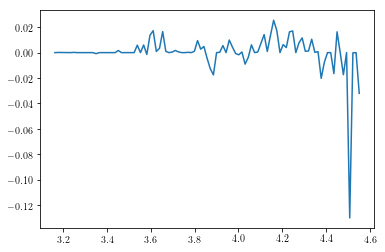

In [37]:
plt.plot(median_sma1, median_cen_icl_mu1 - median_mu1)
plt.show()

0


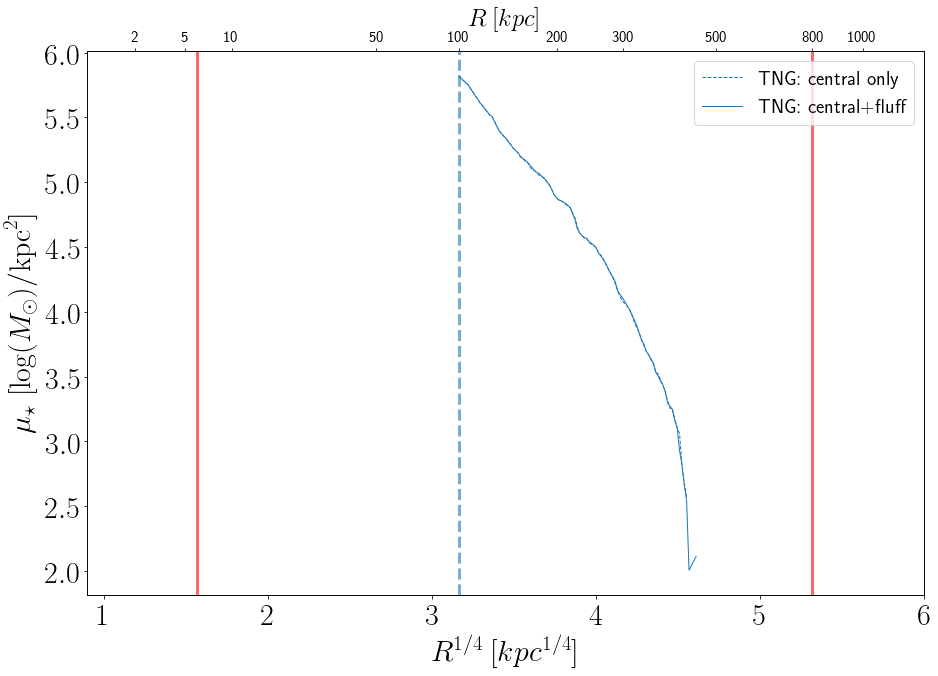

In [36]:
ngals1=0

#plot
fig =plt.figure(figsize=(15, 10))
ax1 = plt.subplot()


######################################################################################################################
# plot
######################################################################################################################
#hsc
# ax1.plot(RSMA_COMMON, hscMedProf_116_118, linestyle='--', linewidth=4.0, c='k',
#          alpha=1, zorder=8, label='HSC')
# ax2.plot(RSMA_COMMON, hscMedProf_118_120, linestyle='--', linewidth=4.0, c='k',
#          alpha=1, zorder=8, label='HSC')
  


# for iso in tng_cen_icl_isos:   
    

#         ngals1+=1

#         #tng_isos1.append(iso)

#         ax1.plot((iso['sma'] * pixel_scale) ** 0.25,
#              np.log10(iso['intens'] / (pixel_scale**2.0))+ np.log10(0.7 ** 2.0) , linewidth=0.5, c=u'#d62728', alpha=0.1, 
#                  label='_nolegend_', zorder=1)
#                  #label='TNG Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))


# ## median profiles for tng
# median_cen_icl_sma1, median_cen_icl_mu1 = get_median_profile(tng_cen_icl_isos, pixel_scale = pixel_scale, rmax=800.**0.25)

ax1.plot(median_sma1, median_mu1,
         linewidth=1.0, c=u'#1f77b4', alpha=1,
         label='TNG: central only', linestyle='--', zorder=8)
ax1.plot(median_sma1, median_cen_icl_mu1,
         linewidth=1.0, c=u'#1f77b4', alpha=1,
         label='TNG: central+fluff', zorder=8)


print ngals1


######################################################################################################################
# plot details
######################################################################################################################
# # X-Y limits
ax1.set_xlim(0.9, 6)
#ax1.set_ylim(-2, 10)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25, 500**0.25, 800**0.25, 1000**0.25])
ax1_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300, 500, 800, 1000])
ax1_twin.tick_params(axis='both', which='major', labelsize=15)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax1.axvline(800.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_TNG.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()